In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [3]:
data = pd.read_csv('../../Documents/Data/Project/ML_data.csv',
                   engine="python", encoding='utf-8')
data["상승하락_합"] = data["상승"] - data["하락"]
data

,일자,총지수,상승,하락,상승하락_합
0,201101,82.427,171,19,152
1,201102,83.091,167,9,158
2,201103,83.906,94,19,75
3,201104,84.602,66,27,39
4,201105,85.194,96,48,48
...,...,...,...,...,...
115,202008,103.505,179,7,172
116,202009,104.333,147,8,139
117,202010,105.035,118,15,103
118,202011,106.549,140,3,137


In [4]:
data_y = data.loc[:,["총지수"]]
data_y
data_x2 = data.loc[:,["상승","하락"]]
data_x2

,상승,하락
0,171,19
1,167,9
2,94,19
3,66,27
4,96,48
...,...,...
115,179,7
116,147,8
117,118,15
118,140,3


In [5]:
data_x1 = data.loc[:,["상승하락_합"]]

In [6]:
for i in range(len(data_x1.values)) :
    if data_x1.values[i] < 0 :
        data_x1.values[i] = 0
data_x3 = np.log1p(data_x1, )
data_x3

,상승하락_합
0,5.030438
1,5.068904
2,4.330733
3,3.688879
4,3.891820
...,...
115,5.153292
116,4.941642
117,4.644391
118,4.927254


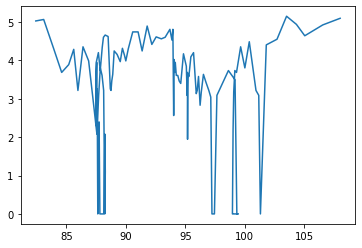

In [7]:
plt.plot(data_y,data_x3)
plt.show()

In [8]:
x0 = np.ones((data_x3.shape[0],1))
X = np.hstack((x0,data_x3))
w1 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(data_y)
print(w1)

[[94.27707249]
 [-0.33698591]]


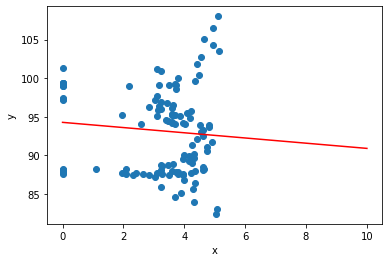

In [9]:
plt.scatter(data_x3, data_y)
plt.plot([0,10], [w1[0], 10*w1[1]+w1[0]], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 1차 선형회귀분석

In [11]:
data_x1 = data.loc[:,["상승하락_합"]]

In [49]:
data_y

,총지수
0,82.427
1,83.091
2,83.906
3,84.602
4,85.194
...,...
115,103.505
116,104.333
117,105.035
118,106.549


In [45]:
X.T.dot(X)

array([[ 7.6270400e+05,  7.9280600e+05,  3.7639500e+05,  1.9578300e+05,
         2.4093600e+05,  3.6134400e+05,  1.2052800e+05,  3.8642900e+05,
         2.6602100e+05,  1.0046000e+05,  3.5239000e+04,  1.0547700e+05,
         2.2086800e+05,  1.8073200e+05,  1.2052800e+05, -7.5135000e+04,
         1.0154000e+04,  3.5239000e+04, -1.4035600e+05, -1.6042400e+05,
        -7.0118000e+04, -3.4999000e+04,  5.0290000e+04,  3.0222000e+04,
        -1.0022000e+05,  1.2554500e+05,  6.5341000e+04,  2.5598700e+05,
         2.1585100e+05,  4.5273000e+04,  8.0392000e+04,  1.6066400e+05,
         2.5598700e+05,  3.3124200e+05,  2.0581700e+05,  3.8141200e+05,
         4.9680300e+05,  5.2690500e+05,  5.0683700e+05,  1.2554500e+05,
         1.2052800e+05,  1.5564700e+05,  1.8574900e+05,  3.4629300e+05,
         3.1619100e+05,  2.6100400e+05,  3.7137800e+05,  3.1117400e+05,
         2.6602100e+05,  3.6636100e+05,  5.7205800e+05,  5.7205800e+05,
         3.4629300e+05,  6.6738100e+05,  4.1151400e+05,  5.01820

In [50]:
np.linalg.inv(X.T.dot(X))

array([[ 1.44865107e-02, -1.47175859e-04],
       [-1.47175859e-04,  3.52025176e-06]])

In [12]:
x0 = np.ones((data_x1.shape[0],1))
X = np.hstack((x0,data_x1))
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(data_y)
print(w)

[[ 9.33245718e+01]
 [-2.71768417e-03]]


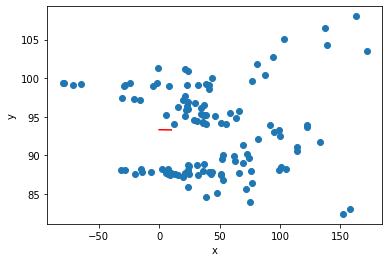

In [13]:
plt.scatter(data_x1, data_y)
plt.plot([0,10], [w[0], 10*w[1]+w[0]], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(data_x1,data_y, random_state=42)

In [15]:
clf = LinearRegression()
clf.fit(X_train,Y_train)
# 추정 된 모수 확인(상수항 제외) & 상수항 확인               
print(clf.coef_,clf.intercept_)

[[0.00065048]] [93.47058888]


In [16]:
clf.predict(X_test)        # 예측
clf.score(X_test, Y_test) # 모형 성능 평가

-0.05163598877561615

## 2차 선형회귀분석 (K-FOLD)

In [17]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle= False)

omg = []

for train_idx, test_idx in kfold.split(data_x2, data_y) :
    X_train, X_test = data_x2.iloc[train_idx], data_x2.iloc[test_idx]
    Y_train, Y_test = data_y.iloc[train_idx], data_y.iloc[test_idx]
    

    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    omg.append(clf.score(X_test, Y_test))
    
    print(clf.score(X_test, Y_test))
    
print("총 평균 스코어..", np.mean(omg))

-23.603974217528275
-62.28043266556783
-0.18246385659297037
-17.042446274920323
-17.275827904369397
총 평균 스코어.. -24.07702898379576


In [18]:
from sklearn.model_selection import cross_val_score, cross_validate
from pandas import Series, DataFrame

# cross_val_score 수행
cross_val_score(clf, data_x2, data_y, cv = 5)
# 유효성 평가
DataFrame(cross_validate(clf, data_x2, data_y, cv = 5, return_train_score = True))

,fit_time,score_time,test_score,train_score
0,0.005997,0.006001,-23.603974,0.072438
1,0.007004,0.004998,-62.280433,0.028177
2,0.005999,0.006001,-0.182464,0.027789
3,0.006001,0.005001,-17.042446,0.064705
4,0.007002,0.004998,-17.275828,0.061094


# 시계열

In [19]:
con = lambda x : x[:4] + "-" + x[4:]
data_p=data.loc[:,["일자","총지수"]]
data_p["일자"]= data_p["일자"].astype("str")
data_p["일자"] = data_p["일자"].map(con)
data_p.rename(columns={"일자":"ds","총지수": "y"}, inplace=True)
data_p= data_p.astype({"ds":"datetime64[ns]","y":"float"})
data_p

,ds,y
0,2011-01-01,82.427
1,2011-02-01,83.091
2,2011-03-01,83.906
3,2011-04-01,84.602
4,2011-05-01,85.194
...,...,...
115,2020-08-01,103.505
116,2020-09-01,104.333
117,2020-10-01,105.035
118,2020-11-01,106.549


In [20]:
from fbprophet import Prophet
pr = Prophet()
pr.fit(data_p)
fu = pr.make_future_dataframe(periods=5,freq="M")
fu_data = pr.predict(fu)
fu_data.loc[:,['ds','trend',"yhat_lower","yhat_upper","yhat"]].tail(6)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,yhat
119,2020-12-01,104.218382,104.010594,105.683644,104.884223
120,2020-12-31,104.469028,103.709994,105.513838,104.573080
121,2021-01-31,104.728028,103.759303,105.442791,104.597750
122,2021-02-28,104.961964,103.985063,105.714911,104.862056
123,2021-03-31,105.220965,104.185197,105.870591,105.017133
124,2021-04-30,105.471611,104.408933,106.115452,105.231440


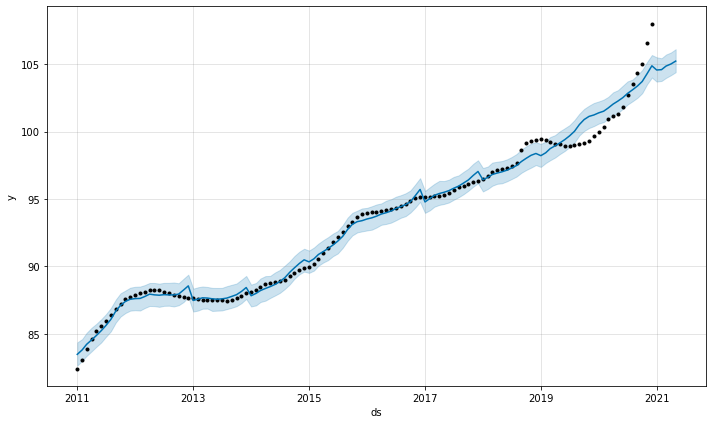

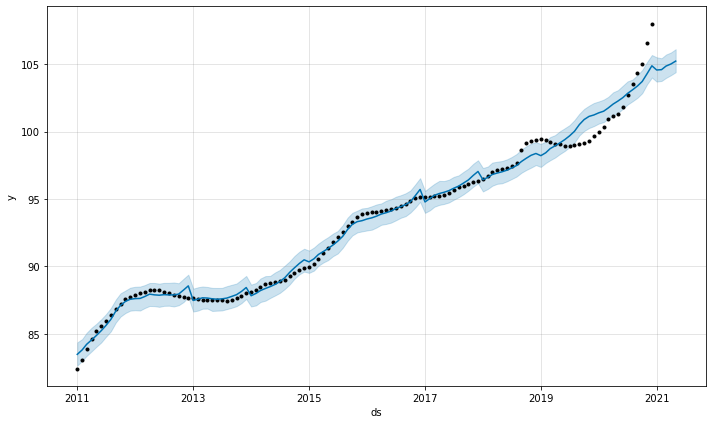

In [21]:
pr.plot(fu_data.loc[:,['ds','trend',"yhat_lower","yhat_upper","yhat"]])

In [22]:
fu_data_r = fu_data.loc[:,['ds',"yhat_lower","yhat_upper","yhat"]].tail(6)

In [23]:
fu_data_r.index = fu_data_r["ds"]
fu_data_r.drop(columns="ds", axis=1, inplace=True)
fu_data_r["yhat"]

ds
2020-12-01    104.884223
2020-12-31    104.573080
2021-01-31    104.597750
2021-02-28    104.862056
2021-03-31    105.017133
2021-04-30    105.231440
Name: yhat, dtype: float64

In [24]:
from statsmodels.tsa.stattools import adfuller
def adf_test(df) :
    result = adfuller(df.values)
    print("ADF Statistics: %f" %result[0])
    print("p-value: %f" % result[1])
    print("Critical values:")
    for key, value in result[4].items():
        print("\t%s: %.3f" % (key, value))
    return result

In [25]:
print("ADF Test: House Price")
result = adf_test(fu_data_r["yhat"])

ADF Test: House Price
ADF Statistics: -0.364525
p-value: 0.915856
Critical values:
	1%: -7.355
	5%: -4.474
	10%: -3.127


In [26]:
data_p

,ds,y
0,2011-01-01,82.427
1,2011-02-01,83.091
2,2011-03-01,83.906
3,2011-04-01,84.602
4,2011-05-01,85.194
...,...,...
115,2020-08-01,103.505
116,2020-09-01,104.333
117,2020-10-01,105.035
118,2020-11-01,106.549


In [27]:
data_p["ratio_y"] = 100*data_p["y"].pct_change()
data_p.dropna(inplace=True)
data_p.head()
data_p["y"] = data_p["ratio_y"]


In [28]:
data_p.drop(columns="ratio_y", axis=1 , inplace=True)
data_p

,ds,y
1,2011-02-01,0.805561
2,2011-03-01,0.980852
3,2011-04-01,0.829500
4,2011-05-01,0.699747
5,2011-06-01,0.495340
...,...,...
115,2020-08-01,0.781874
116,2020-09-01,0.799961
117,2020-10-01,0.672846
118,2020-11-01,1.441424


In [29]:
pr = Prophet()
pr.fit(data_p)
fu = pr.make_future_dataframe(periods=5,freq="M")
fu_data = pr.predict(fu)
fu_data.loc[:,['ds','trend',"yhat_lower","yhat_upper","yhat"]].tail(6)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,yhat
118,2020-12-01,0.301267,0.001007,0.670061,0.333220
119,2020-12-31,0.302490,-0.164025,0.515965,0.188745
120,2021-01-31,0.303754,-0.075518,0.628223,0.281111
121,2021-02-28,0.304895,-0.045210,0.671111,0.330627
122,2021-03-31,0.306159,-0.073560,0.617876,0.277996
123,2021-04-30,0.307382,-0.112071,0.556632,0.224325


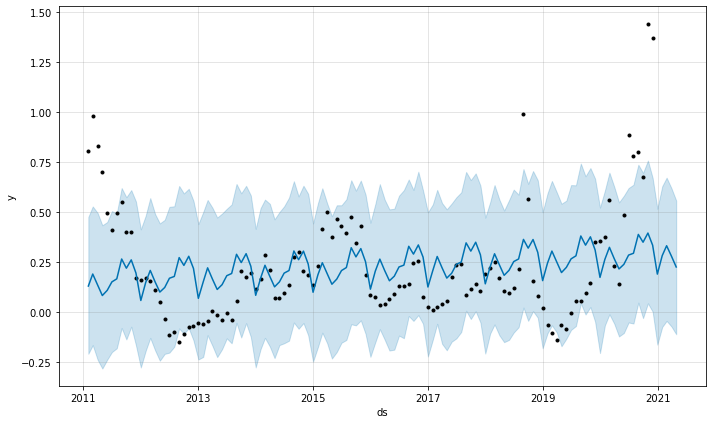

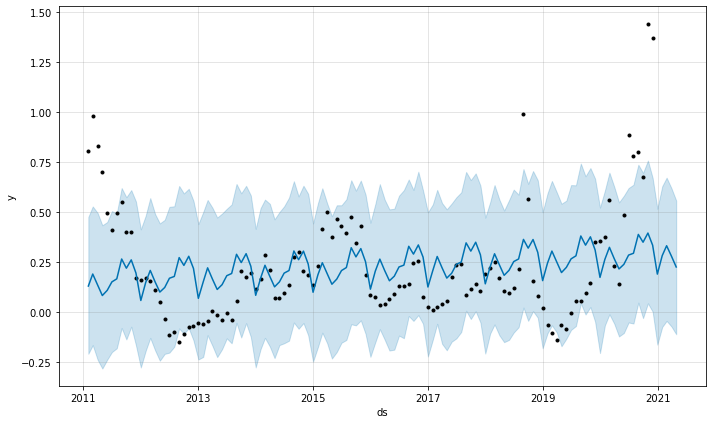

In [30]:
pr.plot(fu_data.loc[:,['ds','trend',"yhat_lower","yhat_upper","yhat"]])

In [31]:
fu_data_r = fu_data.loc[:,['ds',"yhat_lower","yhat_upper","yhat"]].tail(6)

In [32]:
fu_data_r.index = fu_data_r["ds"]
fu_data_r.drop(columns="ds", axis=1, inplace=True)
print("ADF Test: House Price Ratio")
result = adf_test(fu_data_r["yhat"])

ADF Test: House Price Ratio
ADF Statistics: -3.980444
p-value: 0.001516
Critical values:
	1%: -7.355
	5%: -4.474
	10%: -3.127
